# Geospatial Data Analysis fundamentals
CEWA599  
February 1, 2019

# Goals
* Review some fundamental concepts that are common to most geospatial analysis
* Explore coordinate systems, projections and transformations, geometry types
* Create more sophisticated visualizations involving multiple layers and data types

## Outline

1. Spatial reference systems  
    1.1 Horizontal coordinate system  
    1.2 Vertical coordinate system (datum)
    1.3 Formats:
        - proj string
        - EPSG code
        - Wkt
    1.4 Necessary information for transformations
2. Geometries  
    2.1 Points, Lines, Polygons  
    2.2 Creating geometries
3. Dataset properties: extent
4. Coordinate transformations, reprojection
5. Basic vector operations

## Key modules and packages
* geopandas - high-level vector processing (most of what we'll do)
    * fiona - handles input/output
        * ogr
        * osr
        * [proj](https://proj4.org/)
    * shapely - underlying geometry manipulation
        * geos

# Exercises

## Import necessary modules

In [1]:
#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
#plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.figsize'] = [10, 9]


# Part 1: Projections

There are many excellent references out there about coordinate systems and map projections.  I'm not going to try to reproduce here.  If you're relatively new to all of this, check these out:
* http://resources.esri.com/help/9.3/arcgisengine/dotnet/89b720a5-7339-44b0-8b58-0f5bf2843393.htm
* http://maps.unomaha.edu/Peterson/gis/notes/MapProjCoord.html
* http://downloads2.esri.com/support/documentation/ao_/710Understanding_Map_Projections.pdf

## Load world country polygons (bundled with geopandas)

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Check the coordinate reference system (crs)

In [3]:
world.crs

{'init': 'epsg:4326'}

## Look up this EPSG code online (and burn it into your brain)

# WGS84
## http://spatialreference.org/ref/epsg/wgs-84/

## Plot the GeoDataFrame using the built-in geopandas plot function with default settings

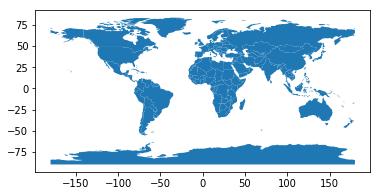

In [4]:
world.plot()

## Define a custom projection centered on the (self-proclaimed) "Center of the Universe"
### Fremont, Seattle, WA, Earth
* https://www.atlasobscura.com/places/center-of-the-universe-sign
* You'll probably need to look up some coordinates on the web
* Create a proj4 string (make sure you use sufficient precision for your decimal)
* Choose a simple projection that accepts a center latitude and center longitude (e.g., orthographic)

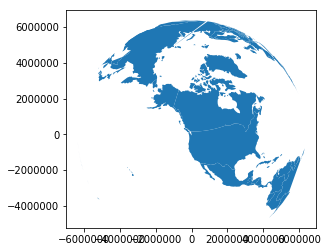

In [5]:
# 47.661133, -122.3565657
Fmont = world.to_crs("+proj=ortho +lat_0=47.661133 +lon_0=-122.356565 +datum=WGS84")
Fmont.plot()

## Transform the world!
* Use GeoPandas to reproject the world GeoDataFrame to your local projection, centered on the center of the universe
* See documentation here: http://geopandas.org/projections.html
* Reduce our beautiful [multidimensional universe](http://mentalfloss.com/article/501926/how-many-dimensions-are-there) to a 2D plot

In [6]:
# see step above

## Wow, that was easy!
* Let's experiment with a few additional projections
* Try the following EPSG codes:
    * EPSG:3031 - South Polar Stereographic (see if you can find Antarctica)
    * EPSG:3857 - web mercator (format for most tiles like Google Satellite)
    * Another EPSG code of your choosing (note some may not render correctly due to antimeridian and poles)
* Check out: https://bl.ocks.org/syntagmatic/ba569633d51ebec6ec6e and https://www.jasondavies.com/maps/transition/ for interactive visualizations
* Also, https://xkcd.com/977/

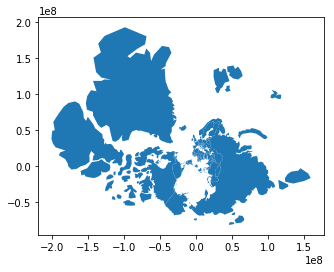

In [7]:
SPStereo = world.to_crs("+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
SPStereo.plot()

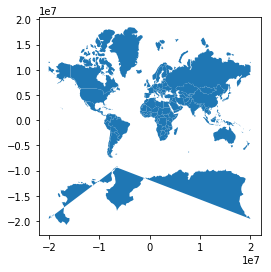

In [8]:
webMerc = world.to_crs("+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext  +no_defs")
webMerc.plot()

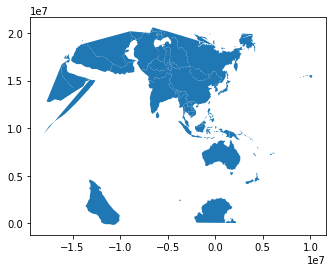

In [9]:
srOrg = world.to_crs("+proj=tmerc +lat_0=0 +lon_0=132 +k=0.9996 +x_0=500000 +y_0=10000000 +ellps=WGS84 +units=m +no_defs")
srOrg.plot()

## Tissot example

We're not going to get into cartopy right now, but I created the following function to show the classic [Tissot indicatrix](https://en.wikipedia.org/wiki/Tissot%27s_indicatrix) example, which help visualize distortion in different projections

In [10]:
#Function to create cartopy plot with Tissot circles for input crs

def makeplot(crs):
    fig, ax = plt.subplots(subplot_kw={'projection': crs})
    lons = range(-180, 180, 20)
    lats = range(-90, 90, 20)
    ax.coastlines()
    #ax.stock_img()
    ax.tissot(facecolor='orange', alpha=0.4, rad_km=500, lons=lons, lats=lats)
    ax.set_title('%s\n%s' % (crs, crs.proj4_init), fontsize=8)
    ax.set_global()
    #ax.add_geometries(world_proj['geometry'], crs=crs)
    return ax

/opt/conda/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f500a193e60> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/opt/conda/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f5009fea048> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/opt/conda/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f5009fea200> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/opt/conda/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f5009fea3b8> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/opt/conda/lib/python3.6/site-packages/cartopy/mpl/geoaxes.p

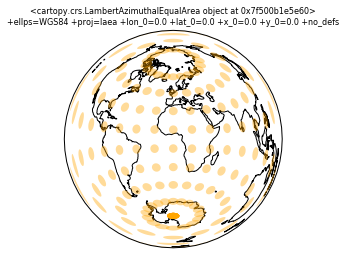

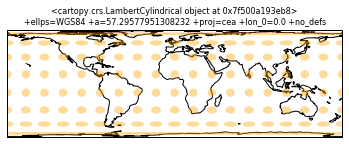

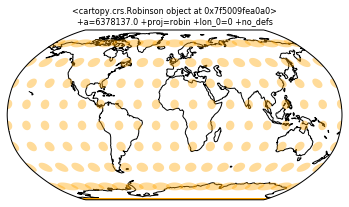

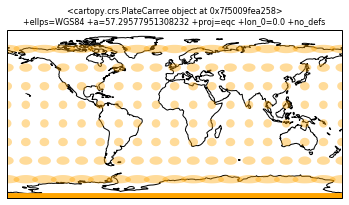

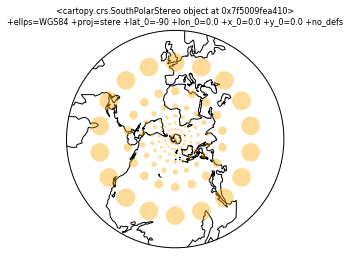

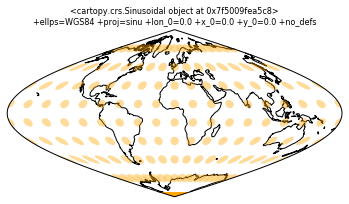

In [11]:
import cartopy.crs as ccrs

makeplot(ccrs.LambertAzimuthalEqualArea())
makeplot(ccrs.LambertCylindrical())
makeplot(ccrs.Robinson())
makeplot(ccrs.PlateCarree())
makeplot(ccrs.SouthPolarStereo())
makeplot(ccrs.Sinusoidal())




# Part 2: ICESat may be dead, but the points live on...
* Let's continue to play with the CONUS GLAS csv dataset
* But this time, let's move beyond basic NumPy and Pandas and start using GeoPandas

## Load the csv into a Pandas DataFrame

In [12]:
df_glas = pd.read_csv('GLAH14_tllz_conus_lulcfilt_demfilt.csv')

In [13]:
df_glas.describe()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc
count,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000,65236.000000
mean,2005.945322,732291.890372,40.946798,-115.040612,1791.494167,1792.260964,5.504748,30.339444
std,1.729573,631.766682,3.590476,5.465065,1037.183482,1037.925371,7.518558,3.480576
min,2003.139571,731266.943345,34.999455,-124.482406,-115.550000,-114.570000,0.000000,12.000000
25%,2004.444817,731743.803182,38.101451,-119.257599,1166.970000,1168.240000,0.070000,31.000000
50%,2005.846896,732256.116938,39.884541,-115.686241,1555.730000,1556.380000,1.350000,31.000000
75%,2007.223249,732758.486046,43.453565,-109.816475,2399.355000,2400.072500,9.530000,31.000000
max,2009.775995,733691.238341,48.999727,-104.052336,4340.310000,4252.940000,49.900000,31.000000


# Convert (lat,lon) values in GeoDataFrame columns to Shapely Point geometry objects
* Create a function that accepts a single row from a Pandas DataFrame as an argument and returns a Shapely POINT
* Pay attention to ordering of your x and y coordinates when creating the POINT object
* Note that you can also do this with a lambda function, so if you feel comfortable go for it

In [14]:
# didn't end up creating a function
# example you provided in pre-class links had a much more efficient way
from geopandas import GeoSeries
df_glas['geometry'] = GeoSeries(Point(xy) for xy in zip(df_glas['lon'],df_glas['lat']))

## Apply this function to each row in the DataFrame
* Make sure you specify the axis correctly
* Store the output in a new column called 'geometry'
* Run a quick head() to verify that you have a new 'geometry' column containing POINT objects

In [15]:
#did most in step above
df_glas.head()

,decyear,ordinal,lat,lon,glas_z,dem_z,dem_z_std,lulc,geometry
0,2003.139571,731266.943345,44.157897,-105.356562,1398.51,1400.52,0.33,31,POINT (-105.356562 44.157897)
1,2003.139571,731266.943346,44.150175,-105.358116,1387.11,1384.64,0.43,31,POINT (-105.358116 44.150175)
2,2003.139571,731266.943347,44.148632,-105.358427,1392.83,1383.49,0.28,31,POINT (-105.358427 44.148632)
3,2003.139571,731266.943347,44.147087,-105.358738,1384.24,1382.85,0.84,31,POINT (-105.358738 44.147087)
4,2003.139571,731266.943347,44.145542,-105.359048,1369.21,1380.24,1.73,31,POINT (-105.359048 44.145542)


## Convert your Pandas DataFrame with `geometry` column to a GeoPandas GeoDataFrame

In [16]:
from geopandas import GeoDataFrame
gdf = GeoDataFrame(geometry=df_glas['geometry'],crs = {'init':'epsg:4326'})
#explicitly defined just what I need for following questions
gdf['glas_z'] = df_glas['glas_z']

## Set the coordinate reference system
* http://geopandas.org/projections.html
* Probably easiest to use an EPSG code for geographic lat/lon coordinate system here
* Note that you can also define this during the initial GeoDataFrame creation

In [17]:
# did in step above

## Plot the points using built-in geopandas plot function
* Check the documentation
* Color points by 'glas_z'
* Set point size appropriately
* Add a colorbar

Text(0.5, 1.0, 'ICESat surface elevation [m]')

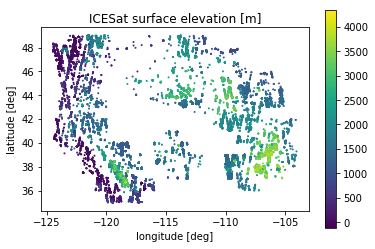

In [18]:
ax = gdf.plot(c = gdf["glas_z"],legend=False,markersize=1)
c = plt.colorbar(ax.collections[0],ax=ax)
plt.ylabel('latitude [deg]')
plt.xlabel('longitude [deg]')
plt.title('ICESat surface elevation [m]')

## Convert the points to a projected coordinate system
* Use an appropriate Universal Transverse Mercator (UTM) zone
* Store the output as a new GeoDataFrame

In [19]:
geomUTM = GeoDataFrame(gdf,geometry=gdf['geometry'],\
                      crs={'init':'epsg:4326'})
geomUTM.to_crs(epsg=32610,inplace=True)
geomUTM.crs

{'init': 'epsg:32610', 'no_defs': True}

## Create a new plot of the reprojected points
* Note the aspect ratio

Text(0.5, 1.0, 'ICESat surface elevation [m]')

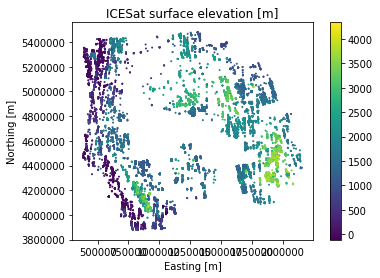

In [20]:
ax2 = geomUTM.plot(c = geomUTM["glas_z"],legend=False,markersize=1)
plt.colorbar(ax2.collections[0],ax=ax2)
plt.ylabel('Northing [m]')
plt.xlabel('Easting [m]')
plt.title('ICESat surface elevation [m]')

## Excellent, but what did we just do?

Under the hood, GeoPandas used fiona and the proj library to transform each point from one coordinate system to another coordinate system.  

You've all done this kind of thing before: https://en.wikipedia.org/wiki/List_of_common_coordinate_transformations

In 2D, transforming (x,y) coordinates between different projections (e.g., UTM vs. Albers Equal Area) on the same reference ellipsoid is pretty straightforward.  Things start to get more complicated when you include different ellipsoid models, horizontal/vertical datums, etc.  Oh, also the Earth's surface is not static - plate tectonics make everything more complicated, as time becomes important, and transformations must include a "kinematic" component.  

Fortunately, the PROJ library (https://proj4.org/about.html) has generalized much of the complicated math for geodetic coordinate transformations.  It's been under development since the 1980s, and our understanding of the Earth's shape and plate motions has changed dramatically in that time period.  So, still pretty complicated, and there are different levels of support/sophistication in the tools/libraries that use PROJ (like fiona or GeoPandas).

We aren't going to get into the details here, but quickly take a look at the Transformations section here to get a sense of how this is actually accomplished: https://proj4.org/operations/index.html

## Add new columns to the GeoDataFrame to store the projected x and y coordinates
* Note: don't _need_ to do this, as the geometry column already stores, but sometimes you want to preserve these if you're going to export or manipulate outside of GeoPandas
* This should be pretty simple - no need for loops or a custom function here (hint: use the x and y attributes of the POINT geometry column)

In [21]:
geomUTM['XUTM'] = GeoSeries(geomUTM['geometry']).x
geomUTM['YUTM'] = GeoSeries(geomUTM['geometry']).y

In [22]:
geomUTM.head()

,geometry,glas_z,XUTM,YUTM
0,POINT (1911163.184756011 5043253.95689207),1398.51,1.911163e+06,5.043254e+06
1,POINT (1911228.985939875 5042368.438693769),1387.11,1.911229e+06,5.042368e+06
2,POINT (1911242.088535058 5042191.486138615),1392.83,1.911242e+06,5.042191e+06
3,POINT (1911255.237968002 5042014.311059044),1384.24,1.911255e+06,5.042014e+06
4,POINT (1911268.46501115 5041837.153394981),1369.21,1.911268e+06,5.041837e+06


## Save reprojected output to disk using the GeoPandas `to_file()` method

In [23]:
#Get a list of available file type drivers for output
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'CSV': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GML': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

## How to choose a format?
* You've all used shapefiles in the past.  This is a legacy format, though it is still widely used.
* http://switchfromshapefile.org/
* Better options these days are Geopackage (GPKG) or in some cases, plaintext GeoJSON
* Use Geopackage for this exercise

In [24]:
geomUTM.to_file('glas_points.gpkg',driver='GPKG')

/opt/conda/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


## :tada:

You can now directly load this gpkg file in any GIS, without defining a coordinate system or dealing with your original csv.  

Try it! Right-click on file in the file browser to the left of the JupyterLab interface, Download.  Then open in QGIS on your local machine.

You can also load this file directly into geopandas in the future using the `read_file()` method, without having to do any of the processing above.

## A quick aside: `gdalsrsinfo`

We covered basic command line usage in Week 01.  We haven't discussed yet, but you will soon realize the power of the GDAL/OGR command-line utilities for batch data processing and quick geodata inspection (we will discuss more during vector/raster modules).

One of these utilties, `gdalsrsinfo`, is great for quickly inspecting datasets, and dealing with srs and converting between different formats (proj4 string, EPSG, etc).

Open a new terminal, navigate to the directory where you just created the output file.  Run:
* `gdalsrsinfo filename.gpkg`
* `gdalsrsinfo EPSG:32610`

By default, this will export a proj4 string and WKT for the crs.  You can also output different formats `gdalsrsinfo -h`

Note that you can also run shell commands directly within a Jupyter notebook using the `!cmd` syntax.  Try this here:

In [25]:
!gdalsrsinfo glas_points.gpkg


PROJ.4 : +proj=utm +zone=10 +datum=WGS84 +units=m +no_defs 

OGC WKT :
PROJCS["WGS 84 / UTM zone 10N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-123],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32610"]]



# Part 3: Let's mix some points and polygons

## Get polygons for US States

Hmmm, let's see.  Two choices:
1. We could go to ESRI or the U.S. Census website, identify and download a shapefile, unzip 4+ files, copy/paste the appropriate \*.shp filename into the notebook.  Wait, how can I download on a remote server?  OK, maybe run something like `wget http://...`, unzip, provide absolute path  
*- OR -*
2. Give geopandas a url string that points to a GeoJSON file somewhere, and read dynamically

Yeah, let's go with #2

Let's use the US States 5 m GeoJSON here: http://eric.clst.org/tech/usgeojson/

Read in the file and inspect to confirm that things look good

In [26]:
df_US = gpd.read_file('http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json')
df_US.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


## Check that crs is defined

In [27]:
df_US['geometry'].crs

{'init': 'epsg:4326'}

## Extract the geometry object for Washington
* Use the state 'NAME' value to isolate the GeoDataFrame entry
* Pull out the geometry object and assign to a variable called `wa_geom`

In [28]:
wa_geom = df_US[df_US['NAME'] == 'Washington'].iloc[0].geometry

## Inspect the Washington geometry object
Take a look at the first few sections of the shapely manual: https://shapely.readthedocs.io/en/stable/manual.html
* What happens when you pass the geometry object to `print()`? (clear the output and describe what happened)
* What happens when you execute a notebook cell containing only the geometry object variable name? Oooh.
* What are the geometry bounds?  What does each of these four values represent?  Note the order.
* What is the geometry type?
* How many individual polygons are contained in the geometry?  If more than one, why?

In [29]:
#print(wa_geom)
# MESS
# I assume this is the x/y coordinate of each vertex on the polygon boundary

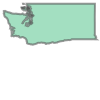

In [30]:
wa_geom

In [31]:
wa_geom.bounds
# represents the furthest extent of the polygon in each each direction. 
# In this case the extents are lat/long oriented (WGS84)
# xmin ymin xmax ymax

(-124.733174, 45.543541, -116.915989, 49.002494)

In [32]:
print(wa_geom.geom_type)
len(wa_geom)
# HERE

MultiPolygon


12

## Cracking open the geometry collection
* Compute the area of each individual polygon (OK to use native units of degrees)
* Isolate and render the polygons that have min and max area
* Render the convex hull of the polygon with max area
* Render and `print()` the polygon with min area
* How many vertices are in each polygon?
    * Hint, can extract list of point tuples using `poly_max.exterior.coords[:]`

In [33]:
area = [polygon.area for polygon in wa_geom]
area.index(max(area))

11

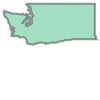

In [34]:
wa_geom[area.index(max(area))]
#print(area[area.index(max(area))])

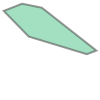

In [35]:
wa_geom[area.index(min(area))]
#print(area[area.index(min(area))])

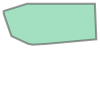

In [36]:
wa_geom[area.index(max(area))].convex_hull

In [37]:
#rendered above
print(wa_geom[area.index(min(area))])

POLYGON ((-122.334524 48.018916, -122.328343 48.021335, -122.321721 48.019977, -122.303455 48.005603, -122.306629 48.004397, -122.326115 48.010295, -122.334524 48.018916))


In [38]:
[len(polygon.exterior.coords[:]) for polygon in wa_geom]

[133, 31, 17, 9, 106, 14, 15, 21, 14, 8, 7, 1366]

## Compute area for all states in the GeoDataFrame
* Area values should be in km<sup>2</sup>
    * Hint: Is this consistent with the original units of your state GeoDataFrame?  What might you need to do to the GeoDataFrame before you proceed?
* Compare your values with the CENSUSAREA values
    * Calculate differences as a percentage of the CENSUSAREA 
    * Hint: CENSUSAREA is in square miles (sigh)

In [39]:
df_US.to_crs(epsg=32610,inplace=True)
df_US.crs

{'init': 'epsg:32610', 'no_defs': True}

In [40]:
df_US['arCalc'] = df_US['geometry'].area*1e-6
df_US['censarConv'] = df_US['CENSUSAREA']*2.5899
df_US['percErrArea'] = (df_US['censarConv']-df_US['arCalc'])/df_US['censarConv']
df_US.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,arCalc,censarConv,percErrArea
47,0400000US53,53,Washington,,66455.521,"(POLYGON ((535640.3276472996 5348457.490369, 5...",175937.857174,172113.153838,-0.022222
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((4213402.929282524 5388017.281548389,...",86822.344723,62256.560079,-0.394589
49,0400000US55,55,Wisconsin,,54157.805,(POLYGON ((2960468.284585998 5748405.833863381...,171196.984561,140263.299170,-0.220540
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((1590531.644434655 4620093.63035647, ...",263347.284677,251461.525876,-0.047267
51,0400000US72,72,Puerto Rico,,3423.775,(POLYGON ((7553412.639927826 3527701.086947289...,24212.115563,8867.234873,-1.730515


Text(0, 0.5, 'percent diff [%]')

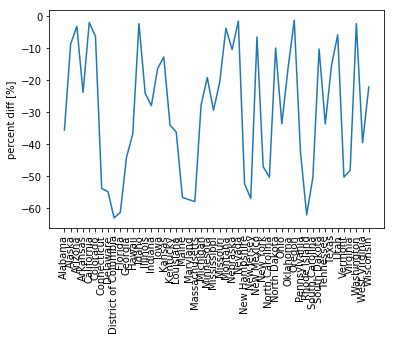

In [41]:
# exclude Puerto Rico
plt.plot(df_US['NAME'][0:50],df_US['percErrArea'][0:50]*100)
plt.xticks(df_US['NAME'][0:50],rotation='vertical')
plt.ylabel('percent diff [%]')

## Create plot of GLAS points and overlay the state borders
In order to calculate areas in km2, you should have reprojected the states GeoDataFrame to a projected coordinate system with units of meters.  Hopefully you chose to use the same projected coordinate system you used above for your GLAS point reprojection.  If not, do that now.

* Use your projected coordinate system
* Use the matplotlib object-oriented interface to plot on the same axes:
    * See notes here: https://matplotlib.org/api/api_overview.html
    * The `plot()` function returns a matplotlib.axes object by default
    * Store the output of your geopandas `plot()` call as a new variable called `ax`
    * Note that you no longer see `<matplotlib.axes._subplots.AxesSubplot at 0x7f0da85f5a58>` output in the notebook
    * You can update the axes by modifying the `ax` object
* Make sure you get the plotting order correct, or appropriately set the `facecolor` and `edgecolor` keyword arguments for transparency

In [42]:
geomUTM["glas_z"].values

array([1398.51, 1387.11, 1392.83, ..., 1556.19, 1556.18, 1556.32])

Text(0.5, 1.0, 'ICESat surface elevation [m]')

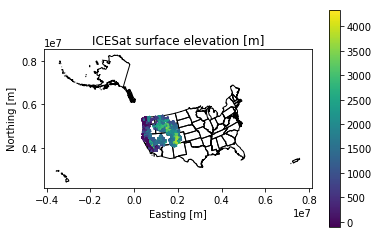

In [43]:
ax = df_US.plot(facecolor='None',edgecolor='black')
plt.scatter(geomUTM['geometry'].x,geomUTM['geometry'].y,\
            c=geomUTM['glas_z'],s=1)
plt.colorbar()
plt.ylabel('Northing [m]')
plt.xlabel('Easting [m]')
plt.title('ICESat surface elevation [m]')

## OK, that looks good, but how do we limit to the Western US

### Get the total bounding box (or extent) of the GLAS points
* Hint: this should be easy with geopandas
* Compute in original lat/lon
* Compute in your chosen projected coordinate system

In [44]:
boundUTM = geomUTM['geometry'].total_bounds
print(boundUTM)

[ 383242.54519522 3878152.56971268 2156906.13666858 5480088.13150153]


### Create a function to pad the bounds by user-specified distance
* Assume the user knows the units of their projection, and specifies this distance appropriately (e.g., not 20000 degrees)

In [45]:
def buffer(bounds,bufWid):
    newBound = bounds
    newBound[0:2] -= bufWid
    newBound[2:4] += bufWid
    return newBound

In [46]:
plotLim = buffer(boundUTM,1000)
print(plotLim[0:4])

[ 382242.54519522 3877152.56971268 2157906.13666858 5481088.13150153]


### Update your plot and set the x and y limits to your padded bounds

Text(0.5, 1.0, 'ICESat surface elevation [m]')

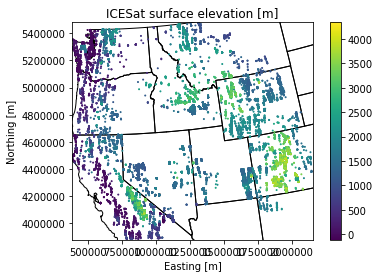

In [47]:
ax = df_US.plot(facecolor='None',edgecolor='black')
plt.scatter(geomUTM['geometry'].x,geomUTM['geometry'].y,\
            c=geomUTM['glas_z'],s=1)
plt.colorbar()
plt.ylim(plotLim[1],plotLim[3])
plt.xlim(plotLim[0],plotLim[2])
plt.ylabel('Northing [m]')
plt.xlabel('Easting [m]')
plt.title('ICESat surface elevation [m]')

# Clip the GLAS points to Washington state polygon
* Extract the Washington geometry from reprojected state GeoDataFrame
    * We can't just reuse the geometry from first part of notebook
* Clip reprojected GLAS point GeoDataFrame with this geometry (hint: look at the intersects and intersection methods)
* Store valid points in a new geodataframe
* Plot the resulting points and the Washington outline in the projected coordinate system

In [48]:
wash = GeoDataFrame(df_US[df_US['NAME'] == 'Washington'],
                    geometry=df_US['geometry'],crs={'init':'epsg:32610'})
washPnts = GeoDataFrame(geomUTM[geomUTM.within(wash.geometry.values[0])],\
                        geometry=geomUTM['geometry'],crs={'init':'epsg:32610'})
washPnts.head()

,geometry,glas_z,XUTM,YUTM
467,POINT (420068.6096560212 5126989.811026542),-23.44,420068.609656,5.126990e+06
468,POINT (420045.6845556927 5127162.808572696),-23.11,420045.684556,5.127163e+06
469,POINT (420022.756572206 5127335.47293138),-23.98,420022.756572,5.127335e+06
470,POINT (419908.0411685074 5128191.352440438),-24.61,419908.041169,5.128191e+06
471,POINT (419885.3355550563 5128362.681306876),-23.92,419885.335555,5.128363e+06


Text(0.5, 1.0, 'ICESat surface elevation [m]')

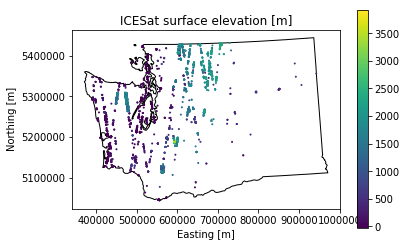

In [49]:
ax = wash.plot(facecolor='None',edgecolor='black')
plt.scatter(washPnts['geometry'].x,washPnts['geometry'].y,\
           c=washPnts['glas_z'],s=1)
plt.colorbar()
plt.ylabel('Northing [m]')
plt.xlabel('Easting [m]')
plt.title('ICESat surface elevation [m]')

## Find the GLAS point closest to the centroid of WA state
* Plot the centroid on your WA map
* What is the distance?

In [50]:
centr = wash.geometry.values[0].centroid
dist = washPnts.distance(wash.geometry.values[0].centroid)
# planar distance in meters (doesn't account for topography)
print(dist.min())

7757.624561183566


Text(0.5, 1.0, 'ICESat surface elevation [m]')

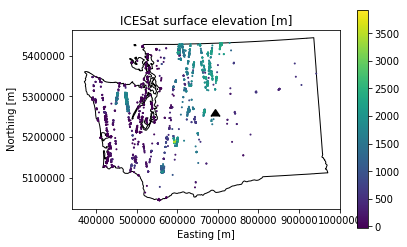

In [51]:
ax = wash.plot(facecolor='None',edgecolor='black')
plt.scatter(washPnts['geometry'].x,washPnts['geometry'].y,\
           c=washPnts['glas_z'],s=1)
plt.colorbar()
plt.scatter(centr.x,centr.y,c='black',marker=10,s=80)
plt.ylabel('Northing [m]')
plt.xlabel('Easting [m]')
plt.title('ICESat surface elevation [m]')

# Extra Credit

Send me a quick message on Slack if you are going to attempt.  Depending on how far we get this week, I may push some of the above exercises and some of the Extra Credit to the Week 5 lab.  

## Compute the number of GLAS points in each state
* Create a cloropleth map to visualize these counts

## Extra Credit (or, other challenging yet interesting problems)

1. See if you can split the ICESat points and create shapely LineString features for each unique track  
    * Note that this information was in the original ICESat dataset, but I removed to reduce file size and complexity
    * What is the longest continuous track?

2. Create a function to automatically compute UTM zone (with appropriate N/S handling) based on input point coordinates

3. Compare your geopandas distances with distances computed using Pythagorean theorem

4. Create a function to identify the 3 closest points to each GLAS point 
    * Then use these 3 points to:
        - Define a plane
        - Calculate the elevation on that planar surface at the original GLAS point coordinates
        - Compute the difference between the interpolate elevation and observed elevation  
        
5. For each GLAS point, compute mean and std for all points within a 10 km radius
    * Can potentially create buffer around the point, then intersect with all points
    * Can compute distance to all points, then threshold

6. Explore some available interpolatoin methods to create a continuous surface of elevation values from the sparse ICESat points
    * This is mostly for illustration, you wouldn't want to use ICESat for this purpose